<a href="https://colab.research.google.com/github/samuelbcarlton/training-neural-networks-in-python-3215347/blob/main/STOR_Math_235_Lab_4_FINAL_upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STOR Math 235 Lab 4: Matrix Algebra and its use in Network Analytics

The goal of this Lab is to show you how Matrix Algebra (i.e. the art of taking Matrices and conducting operations on them such as addition, Matrix multiplication, Eigen-values etc) is amazingly useful in practice.

I have used the following resources:

- [Patrick Walls intro to Mathematical Pyhton](https://patrickwalls.github.io/mathematicalpython/linear-algebra/eigenvalues-eigenvectors/)
- Two nice Github repors for community detection [reference 1](https://github.com/lejomarin/community-network-detection/blob/main/Karate%20club%20-%20network%20dataset.ipynb) and [reference 2](https://github.com/victordaniel/kmeans-clustering-on-graph-dataset-using-Netwokx/blob/master/Karate-club-data.ipynb)
- Overview module for Network analysis using [Python module Graspologic](https://microsoft.github.io/graspologic/tutorials/plotting/networkplot.html)
- [Nice medium article on spectral clustering](https://towardsdatascience.com/spectral-clustering-aba2640c0d5b)
- **Full disclosure:**  Modifying Bing AI copilot queries to speed up code generation.

Again the main goal of this is to show you how the "magic" of Linear Algebra turns out to be amazingly useful in practice. As in the previous lab, I will start out by giving you full code so you can learn and then ask you to modify small aspects of the code and understand what you get.



## Basic house keeping

The first step is to install the module Graspologic.

In [ ]:
# Run the following command.

!pip install graspologic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 45.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.4/872.4 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.6 MB/s eta 0:00:00
  Created wheel for graspologic: filename=graspologic-3.3.0-py3-none-any.whl size=5201791 sha256=8869d75ec6b59c68f7cdefaac6b16726b88a

In [ ]:
!pip install community

# IMPORTANT!!

 After running the above, restart the kernel (On Google Colab: Click Runtime and then Restart session and click yes when it warns you that session info will be lost).

 **After restarting the kernel** import the modules below.  

In [ ]:
import graspologic

/usr/local/lib/python3.10/dist-packages/graspologic/models/edge_swaps.py:215: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  _edge_swap_numba = nb.jit(_edge_swap, nopython=False)


In [ ]:
# Importing necessary modules

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.linalg as la

# Part 1 of the Lab: basic eigen-values and eigen-vectors

Recall the definition of Eigen-values and Eigen-vectors from Module 2. Let us start by trying to extract these quantities from a given matrix. You will see that all the matrices in the module are **symmetric** ($\mathbf{A} = \mathbf{A}^T$) which turns out to be very important for this module.



In [ ]:
A = np.array([[1,2],[2,1]])
print(A)

[[1 2]
 [2 1]]




```
# This is formatted as code
```

Next let us find the eigenvalues and eigen-vectors of this matrix

In [ ]:
eigenvalues = np.array([np.sort(np.linalg.eigvals(A))])
print(eigenvalues)

[[-1.  3.]]


This means that the eigen-values are -1 and 3.

In [ ]:
vals, vecs = np.linalg.eig(A)

# print results
for i, value in enumerate(vals):
    print("Eigenvector:", vecs[:,i], ", Eigenvalue:", value)


Eigenvector: [0.70710678 0.70710678] , Eigenvalue: 3.0000000000000004
Eigenvector: [-0.70710678  0.70710678] , Eigenvalue: -0.9999999999999996


In [ ]:
lambda1 = vals[1]
print(lambda1)

v1 = vecs[:,1].reshape(2,1)
print(v1)

-0.9999999999999996
[[-0.70710678]
 [ 0.70710678]]


Let us check manually that the vector and number lambda1 are in fact an eigen-value and corresponding eigen-vector

In [ ]:
A @ v1

array([[ 0.70710678],
       [-0.70710678]])

In [ ]:
lambda1 * v1

array([[ 0.70710678],
       [-0.70710678]])

## Question 1 [5 points]

Consider the (symmetric) matrix:

$$
\mathbf{A} = \begin{bmatrix}
1 & 5 & 7 \\
5 & 3 & 2 \\
7 & 2 & 11
\end{bmatrix}
$$

1. Find the three eigen-values and eigen-vectors of this matrix.
2. Call the largest eigen-value lambda1 and the corresponding eigen-vector v1. Here suppose the eigen-values are -8, 1, 2  then the largest eigen-value is 2.
3. Make a new vector by lambda1 * v1
4. Compute the vector $\mathbf{A} \times v1$ (i.e. the matrix $\mathbf{A}$ times the vector v1). The code for this is A @ v1.
5. Check that your answers in 3 and 4 match.  

In [ ]:
# Your code here
B = np.array([[1,5,7],[5,3,2],[7,2,11]])
print(B)

eigenvalues = np.array([np.sort(np.linalg.eigvals(B))])
print(eigenvalues)

[[ 1  5  7]
 [ 5  3  2]
 [ 7  2 11]]
[[-4.48554811  3.53646413 15.94908397]]


In [ ]:
vals, vecs = np.linalg.eig(B)

# print results
for i, value in enumerate(vals):
    print("Eigenvector:", vecs[:,i], ", Eigenvalue:", value)

Eigenvector: [-0.48671181 -0.31384717 -0.81523713] , Eigenvalue: 15.949083974404541
Eigenvector: [-0.82627486  0.46827887  0.31302517] , Eigenvalue: -4.485548106753609
Eigenvector: [-0.28351625 -0.82596299  0.48724088] , Eigenvalue: 3.536464132349077


In [ ]:
# Find the largest eigenvalue and corresponding eigenvector
lambda1_index = np.argmax(vals)
lambda1 = vals[lambda1_index]
v1 = vecs[:, lambda1_index]
print("\nLargest Eigenvalue (lambda1):", lambda1)
print("Corresponding Eigenvector (v1):", v1)


Largest Eigenvalue (lambda1): 15.949083974404541
Corresponding Eigenvector (v1): [-0.48671181 -0.31384717 -0.81523713]


In [ ]:
# Make a new vector by lambda1 * v1
new_vector = lambda1 * v1
print("\nNew vector:", new_vector)

# Compute A times v1
Av1 = B @ v1
print("A times v1:", Av1)

# Check if the answers in 3 and 4 match
print("Answers match:", np.allclose(new_vector, Av1))


New vector: [ -7.76260752  -5.00557479 -13.00228538]
A times v1: [ -7.76260752  -5.00557479 -13.00228538]
Answers match: True


# Part 2: The magic of linear algebra in applications

At this point it is fine to still question the point of all of this.

![](https://www.splashlearn.com/blog/wp-content/uploads/2023/10/classwork-vs-test-a-math-dilemma.jpeg)

We will now see how proper representation of (network valued) data coupled with the magic of the concepts we are learning is the key to understand such data. Let us take a specific example from the medium article cited above: Consider the following adjacency matrix of a graph.

This part of the module was modified from [this Medium article on spectral clustering](https://medium.com/towards-data-science/spectral-clustering-aba2640c0d5b)



In [ ]:
A = np.array([
  [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

Let us try to visualize this graph.

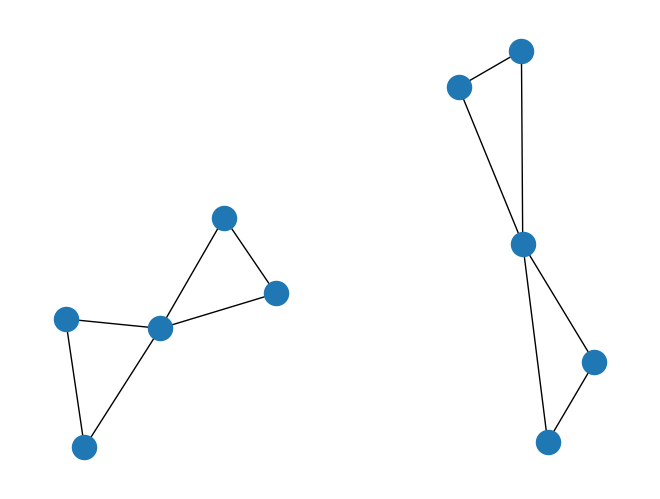

In [ ]:
import networkx as nx
import community as community_louvain

G_medium_article = nx.from_numpy_array(A, create_using=nx.MultiGraph)

nx.draw(G_medium_article)

## Some summary observations of the above network

- The above network has **two** connected components, namely two groups of individuals who can communicate amongst themeslves but not between each set of these individuals.

- **In general, understanding the connectivity of vertices in networks and the ability to partition the network into different groups is one of the most important exploratry data anlytic tasks in a wide array of fields**. The above is an extreme example of a setting where one has two disconnected communities. In real world settings one has communities which are not nescessarily disconnected form each other but where connection within a community is stronger than connections between communities. See the figure below [from Wikipedia](https://commons.wikimedia.org/wiki/File:Network_Community_Structure.svg) an example.  


![From Wikipedia article on Community detection](https://upload.wikimedia.org/wikipedia/commons/f/f4/Network_Community_Structure.svg)


## Major question

Given network data can we develop automated algorithms that take the data and try to find the number of communities and try to partition the network into those communities etc?

### Will describe small aspects of the methodology here

The adjacency matrix of the above graph is $\mathbf{A}$.   Recall that in class, if we summed across each row of the adjacency this would give us the number of friends each vertex has. We will first make a new **diagonal** matrix by writing out these values in the diagonal of a matrix which we will call $\mathbf{D}$.

In [ ]:
D = np.diag(A.sum(axis=1))
print(D)

[[4 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 2]]


## Graph Lapacian

Next we will make a new matrix $\mathbf{L} = \mathbf{D} - \mathbf{A}  $. Why we are doing this will be shortly clear.

In [ ]:
L = D-A
print(L)

[[ 4 -1 -1  0  0  0  0  0 -1 -1]
 [-1  2 -1  0  0  0  0  0  0  0]
 [-1 -1  2  0  0  0  0  0  0  0]
 [ 0  0  0  2 -1 -1  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0  0]
 [ 0  0  0 -1 -1  4 -1 -1  0  0]
 [ 0  0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0  0 -1 -1  2  0  0]
 [-1  0  0  0  0  0  0  0  2 -1]
 [-1  0  0  0  0  0  0  0 -1  2]]


We will now define a function that computes the eigen-values of a given matrix and plots them in increasing order and apply this function to the matrix $\mathbf{L}$.

In [ ]:
def plot_eigenvalues(matrix):
    # Check if the matrix is symmetric
    if not np.allclose(matrix, matrix.T):
        raise ValueError("The matrix is not symmetric")

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)

    # Plot the eigenvalues
    plt.plot(eigenvalues, 'o')
    plt.title("Eigenvalues of the matrix")
    plt.xlabel("Index")
    plt.ylabel("Eigenvalue")
    plt.show()


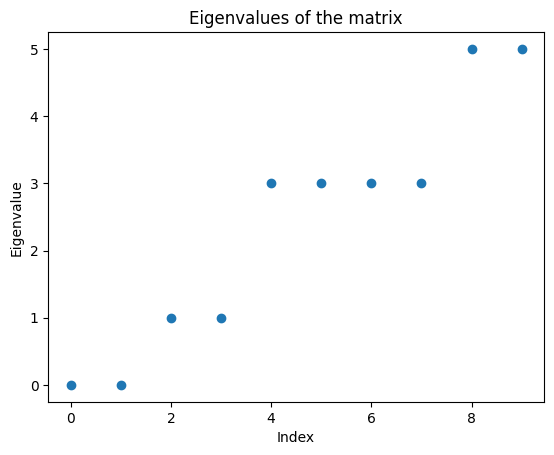

In [ ]:
plot_eigenvalues(L)

# Summary

There were two disconnected components in the network; in the context of the eigen-values of the Graph Laplacian there are **two zero eigen-values**

**Amazing math facts**

1.  The **number** of zero eigen-values count the number of components.
2. Even more amazing: in real data where one does not have complete disconnections! This is what Spectral clustering does.

# Question 2 [5 points]

Starting from the adjacency matrix provided above to you, make an adjacency matrix that has **two additional points** that are not connected to anyone else (so your graph now has **four** connected components), i.e. when you visualize this network it should look something like the image in the Zip file titled "two_more.png".






In [ ]:
## Your adjacency matrix here
# Given adjacency matrix
A = np.array([
    [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
])

# Append two rows and two columns of zeros
n = A.shape[0]
A_with_extra_points = np.zeros((n + 2, n + 2))
A_with_extra_points[:n, :n] = A

# Visualize the new adjacency matrix
print(A_with_extra_points)


[[0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


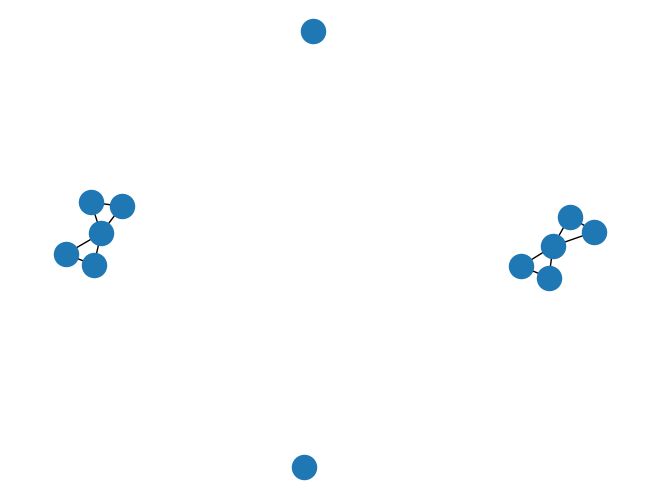

In [ ]:
new_visual = nx.from_numpy_array(A_with_extra_points, create_using=nx.MultiGraph)

nx.draw(new_visual)

# Question 3

Use the above code but now on this new adjacency matrix to

- [5 points] Visualize your graph to check that it in fact it does 4 connected components.
- Compute the corresponding graph Laplacian
- [5 points] Make a plot of the Eigen-values and check that there are 4 zero eigen-values.


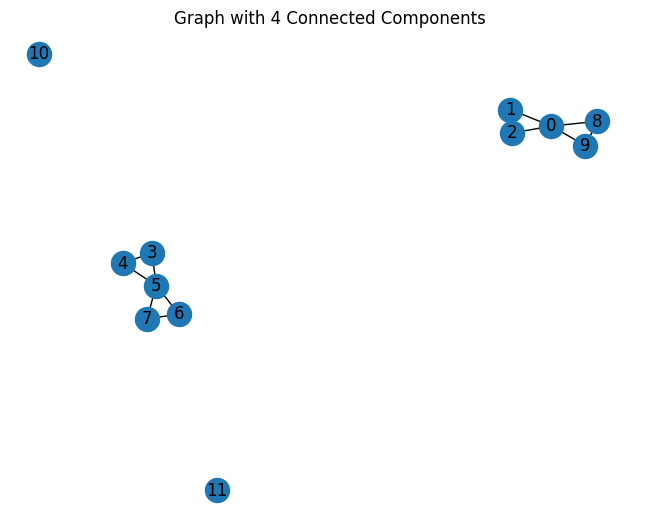

In [ ]:
# Your code for visualization of the graph and output here
G_with_extra_points = nx.from_numpy_array(A_with_extra_points)
nx.draw(G_with_extra_points, with_labels=True)
plt.title("Graph with 4 Connected Components")
plt.show()


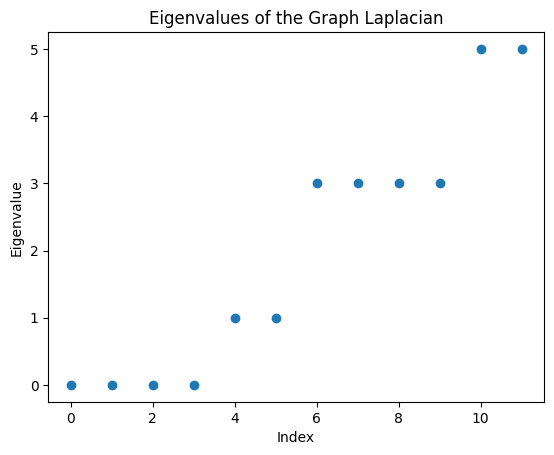

In [ ]:
#Your code for eigen-values and visualization  here
# Compute the graph Laplacian
D_with_extra_points = np.diag(A_with_extra_points.sum(axis=1))
L_with_extra_points = D_with_extra_points - A_with_extra_points

# Plot the eigenvalues of the Laplacian
def plot_eigenvalues(matrix):
    if not np.allclose(matrix, matrix.T):
        raise ValueError("The matrix is not symmetric")

    eigenvalues, _ = np.linalg.eigh(matrix)
    plt.plot(eigenvalues, 'o')
    plt.title("Eigenvalues of the Graph Laplacian")
    plt.xlabel("Index")
    plt.ylabel("Eigenvalue")
    plt.show()

plot_eigenvalues(L_with_extra_points)

# Part 3: Converting the above to the real world

So we have found that properties of the adjacency matrix allow one to really understand connectivity properties of the network. The above were "artifical" in the sense that the components were completely disconnected. Let us consider a more realistic example where there are distinct communities but it is hard to tell just by visualizing the data.

## Simulation test bed

What we will do is we will "simulate" network data on 100 individuals who actually belong to two communities each of size 50 (think of these as voters of two parties and the network data represents friendship relations). There is probability 0.35 of individuals who **belong to the same community** to form friendships and there is probability 0.05 for individuals **between** communities to form friendships. The first two lines below allow you to tune these paramaters (sizes of each communities, propensities of individuals to connect between and across etc).

The code below simulates such a network. Now imagine a setting where you don't know that the network is broken into two communities; rather, you observe network data and try to visualize this. See the kind of plot that one obtains often called a hairball plot as it is impossible to understand the structure of the underlying data even when one has a relative small data set of network size 50+50 = 100. Imagine what would happen if you had to analyze a **Facebook** sized network data set and tried to extract *communities* from this data.



In [ ]:
from graspologic.simulations import sbm

n_communities = [50, 50]
p = [[0.3, 0.05], [0.05, 0.3]]

np.random.seed(1)
A, node_ids = sbm(n_communities, p, return_labels=True)
print(A.shape)

(100, 100)


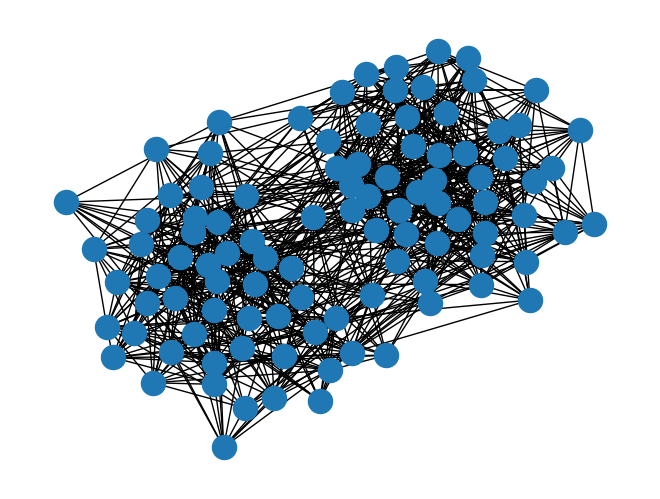

In [ ]:
G_simulated = nx.from_numpy_array(A, create_using=nx.MultiGraph)

nx.draw(G_simulated)

Let us do all the steps we did previously.

[[18.  0.  0. ...  0.  0.  0.]
 [ 0. 19.  0. ...  0.  0.  0.]
 [ 0.  0. 23. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 16.  0.  0.]
 [ 0.  0.  0. ...  0. 19.  0.]
 [ 0.  0.  0. ...  0.  0. 20.]]
[[18.  0. -1. ...  0.  0.  0.]
 [ 0. 19. -1. ...  0.  0. -1.]
 [-1. -1. 23. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 16.  0.  0.]
 [ 0.  0.  0. ...  0. 19. -1.]
 [ 0. -1.  0. ...  0. -1. 20.]]


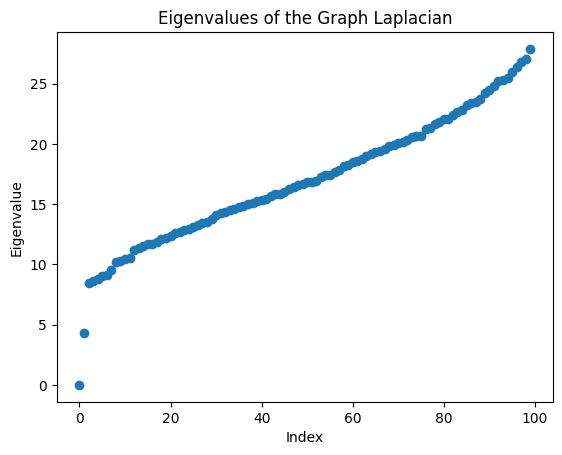

In [ ]:
D = np.diag(A.sum(axis=1))
print(D)

L = D-A
print(L)

plot_eigenvalues(L)

## Magic of eigen values and eigen- vectors

Hard to make out too much structure but it does look like the **smallest two** eigen-values seem seperated from the rest of the eigen-values. There is a "gap". What the next part of the code does is use the Eigen-vectors corresponding to these eigen-values to (a) seperate the points and (b) color code the points according to their **true** communities.

Remember, if someone gives you only the adjacency matrix then all you can do is visualize this and you don't know the true communities. What we will see from the plots is that the seperation achieved by the spectral properties of the adjacency matrix closely corresponds to the true seperation owing to communities; i.e. **the method automatically learns information about the communities by just using information about the adjacency matrix**

In words what this method is doing is:

- Extracting the **eigen-vectors** corresponding to the two **largest** eigen values of the adjacency matrix.
- Call the first eigen-vector X[;,0] and the second eigen-vector X[:,1] (python notation, in general we would write this as X[;1] and X[;2]).
- Thus for example

$$
X[;0] = \begin{bmatrix}
X[1;0]\\
X[2;0]\\
\ddots
X[100;0]
\end{bmatrix}
, \qquad
X[;1] = \begin{bmatrix}
X[1;1]\\
X[2;1]\\
\ddots
X[100;1]
\end{bmatrix}
$$
- Maps the vertices into the Euclidean plan by placing the vertex $i$ at location $(X[i;0], X[i,1])$

This pipleline is sometimes called **Representation learning** finding lower dimensional representations of our network quite often in the Euclidean plane e.g. $\mathbb{R}^2$.

See the work the [Natalie Stanley Group in CS](https://compcylab.squarespace.com) who are doing amazingly cool things with such ideas in the area of computational medicine. See for example the following image from Prof. Stanley's research group:

![](https://images.squarespace-cdn.com/content/v1/60240a133367ac2982ab7aee/4190fa29-4abc-42c5-ab37-3277a15559ec/overview_featurization+%281%29.png?format=2500w)



In [ ]:
from graspologic.embed import AdjacencySpectralEmbed

ase = AdjacencySpectralEmbed(n_components=2)
X = ase.fit_transform(A)

print(X.shape)

(100, 2)


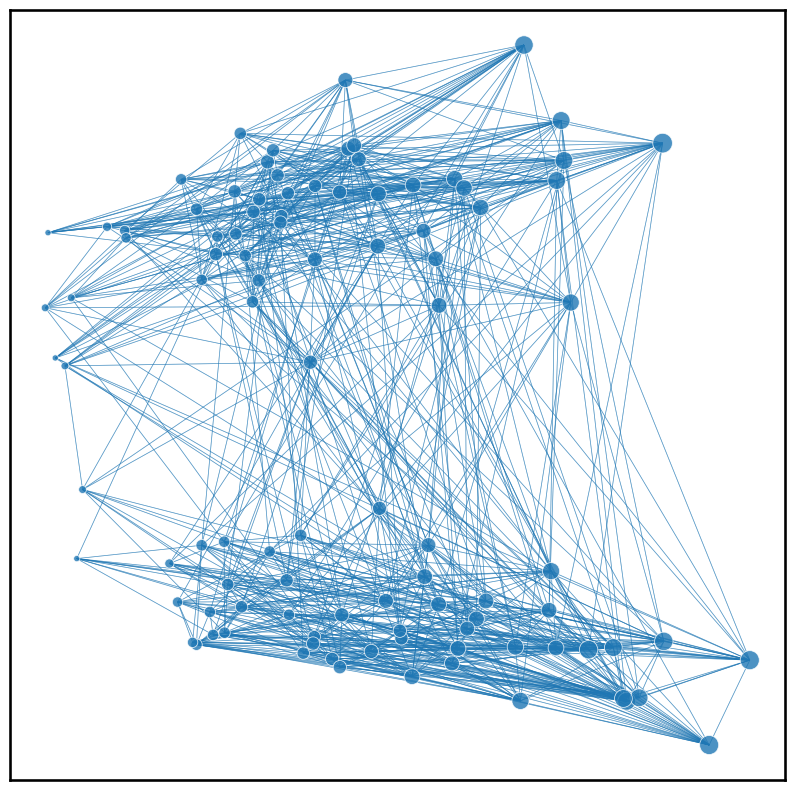

In [ ]:
from graspologic.plot.plot import networkplot

x_pos = X[:,0]
y_pos = X[:,1]
degrees = np.sum(A, axis=0)

plot = networkplot(adjacency=A, x=x_pos, y=y_pos, palette='deep', node_size=degrees,
                   node_sizes=(20, 200), edge_hue='source', edge_alpha=0.5, edge_linewidth=0.5)

Looks like there are **"two" communities**, the "top" part and the bottom part. This is what I would tell a sociologist who came ot my office and gave me this network data.  Now let us put the "true communities" on the above plot to see how well the above seperation corresponds to with regards to the "truth".


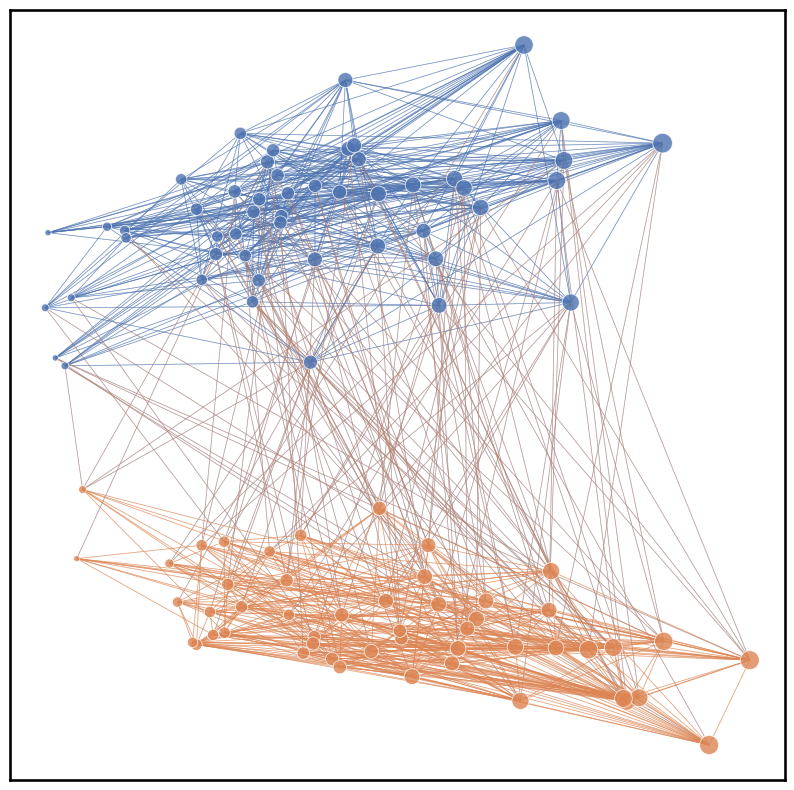

In [ ]:
x_pos = X[:,0]
y_pos = X[:,1]
degrees = np.sum(A, axis=0)

plot = networkplot(adjacency=A, x=x_pos, y=y_pos, node_hue=node_ids, palette='deep', node_size=degrees,
                   node_sizes=(20, 200), edge_hue='source', edge_alpha=0.5, edge_linewidth=0.5)

# Question 4

Use the same code as above for the following two simuation frameworks:

1. **[5 points]** Where the connection matrix p = [[0.5, 0.05], [0.05, 0.5]]
2. **[5 points]** Where now instead of two communities you have three communities each of size 50 and where connection parameters within a community is 0.5 and between different communities is 0.05.

To do Q4.2, the only change you need to make is at the start of the simulation by setting

n_communities = [50, 50, 50]

p = [[0.5, 0.05, 0.05], [0.05, 0.5, 0.05],[0.05, 0.05, 0.5]]

With this hint, you can try to revise the code for Q4.1

 For both Q4.1 and Q4.2 what we are interested in seeing are seeing 3 figures:

 1. the "hairball" type visualization of the original network
 2. Figures akin to the two last figures above (i.e after the "Magic of eigen-vectors") after using the eigen vectors to embed the data.

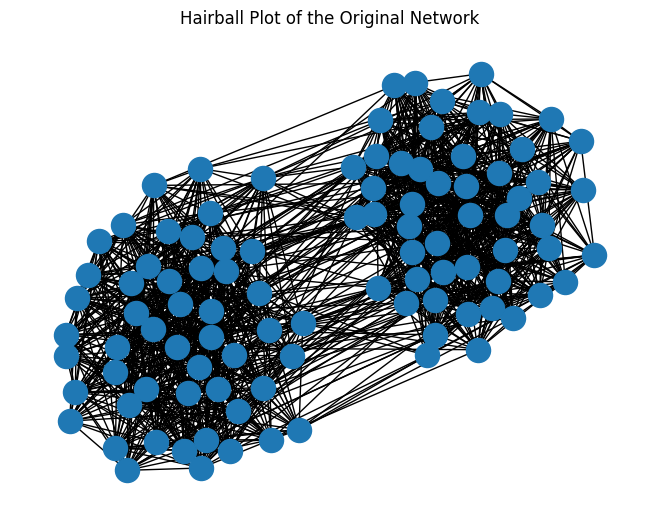

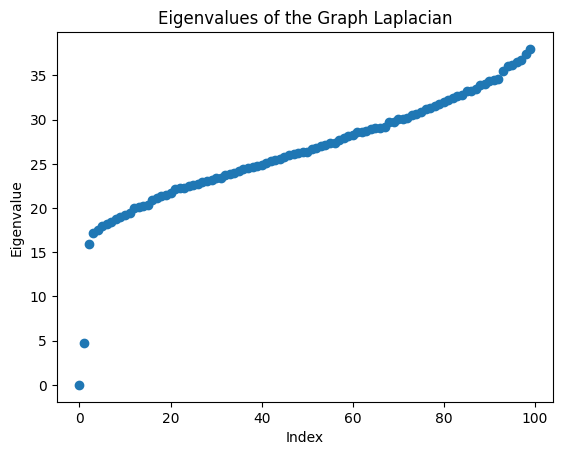

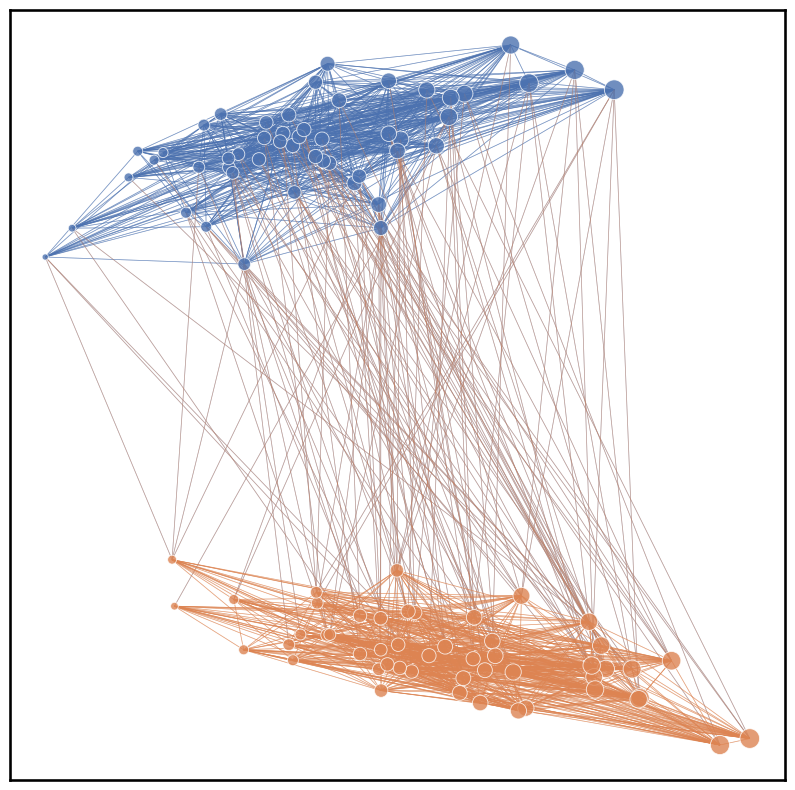

In [ ]:
#Q4.1
from graspologic.simulations import sbm

n_communities = [50, 50]
p = [[0.5, 0.05], [0.05, 0.5]]

# Generate the adjacency matrix
np.random.seed(1)
A, node_ids = sbm(n_communities, p, return_labels=True)

# Visualize the hairball plot
G_simulated = nx.from_numpy_array(A, create_using=nx.MultiGraph)
nx.draw(G_simulated)
plt.title("Hairball Plot of the Original Network")
plt.show()

# Compute the graph Laplacian
D = np.diag(A.sum(axis=1))
L = D - A

# Plot the eigenvalues of the Laplacian
plot_eigenvalues(L)

# Perform spectral embedding
ase = AdjacencySpectralEmbed(n_components=2)
X = ase.fit_transform(A)

# Plot the network with true communities
x_pos = X[:,0]
y_pos = X[:,1]
degrees = np.sum(A, axis=0)

plot = networkplot(adjacency=A, x=x_pos, y=y_pos, node_hue=node_ids, palette='deep', node_size=degrees,
                   node_sizes=(20, 200), edge_hue='source', edge_alpha=0.5, edge_linewidth=0.5)


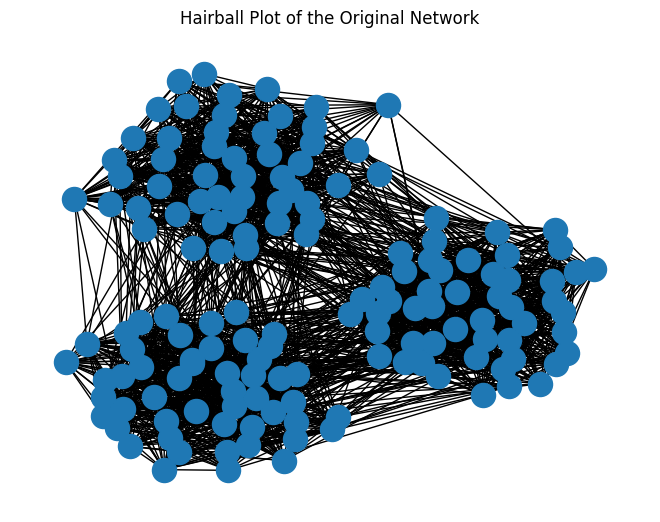

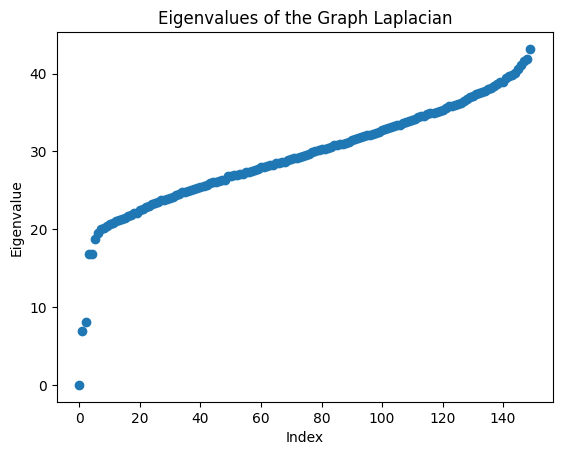

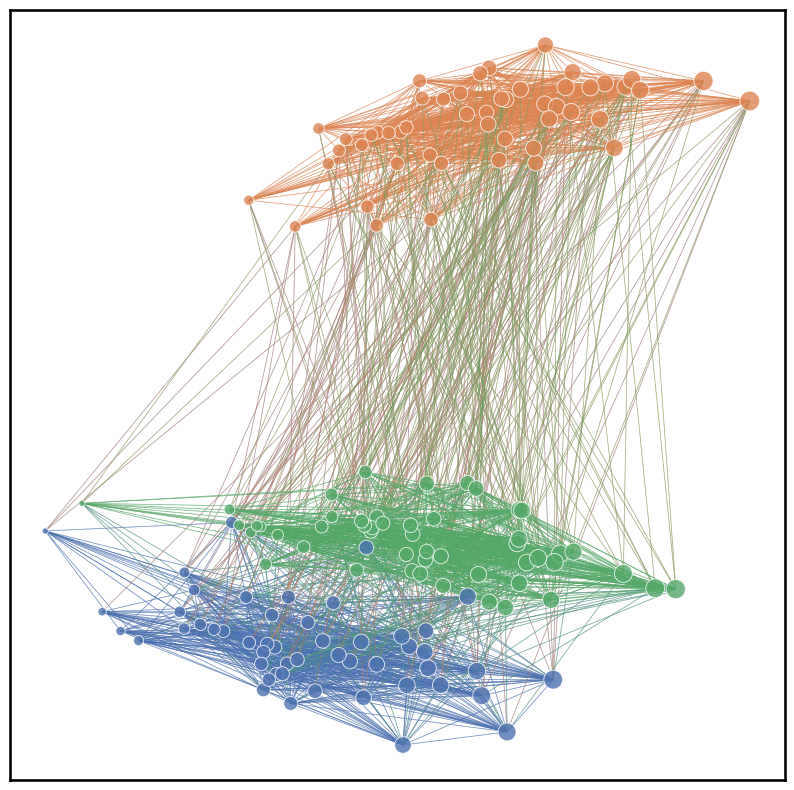

In [ ]:
#Q4.2

n_communities = [50, 50, 50]
p = [[0.5, 0.05, 0.05], [0.05, 0.5, 0.05],[0.05, 0.05, 0.5]]

# Generate the adjacency matrix
np.random.seed(1)
A, node_ids = sbm(n_communities, p, return_labels=True)

# Visualize the hairball plot
G_simulated = nx.from_numpy_array(A, create_using=nx.MultiGraph)
nx.draw(G_simulated)
plt.title("Hairball Plot of the Original Network")
plt.show()

# Compute the graph Laplacian
D = np.diag(A.sum(axis=1))
L = D - A

# Plot the eigenvalues of the Laplacian
plot_eigenvalues(L)

# Perform spectral embedding
ase = AdjacencySpectralEmbed(n_components=2)
X = ase.fit_transform(A)

# Plot the network with true communities
x_pos = X[:,0]
y_pos = X[:,1]
degrees = np.sum(A, axis=0)

plot = networkplot(adjacency=A, x=x_pos, y=y_pos, node_hue=node_ids, palette='deep', node_size=degrees,
                   node_sizes=(20, 200), edge_hue='source', edge_alpha=0.5, edge_linewidth=0.5)


# Part 4: The real world!

Now we will see a real world application of the above methods. This relates to the famous Zachary's Karate club. From the [wikipedia article](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)

*A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.*

**Basic question** Suppose we had access to only the network information of the club. Can we observe the signature of the club splitting into two communities directly using the magic of linear algebra?


In [ ]:
%matplotlib inline
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib.colors as colors
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

# Question 5.1 [2 points]

Load the data from the Networkx module.

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


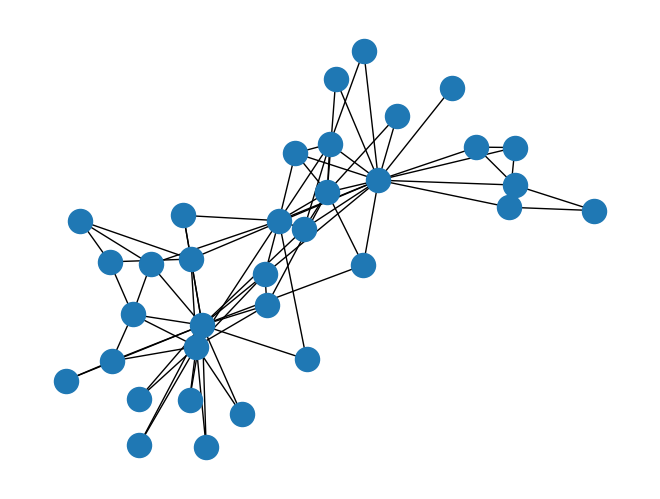

In [ ]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G)
print(G)

# Question 5.2 [2 points]

Plot this data color coding the vertices according to the two communities that this club eventually split into. [Code taken from this Github repo](https://github.com/victordaniel/kmeans-clustering-on-graph-dataset-using-Netwokx/blob/master/Karate-club-data.ipynb)

In [ ]:
def draw_communities(G, membership, pos):
    """Draws the nodes to a plot with assigned colors for each individual cluster
    Parameters
    ----------
    G : networkx graph
    membership : list
        A list where the position is the student and the value at the position is the student club membership.
        E.g. `print(membership[8]) --> 1` means that student #8 is a member of club 1.
    pos : positioning as a networkx spring layout
        E.g. nx.spring_layout(G)
    """
    fig, ax = plt.subplots(figsize=(16,9))

    # Convert membership list to a dict where key=club, value=list of students in club
    club_dict = defaultdict(list)
    for student, club in enumerate(membership):
        club_dict[club].append(student)

    # Normalize number of clubs for choosing a color
    norm = cm.colors.Normalize(vmin=0, vmax=len(club_dict.keys()))

    for club, members in club_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=members,
                               node_color=cm.jet(norm(club)),
                               node_size=500,
                               alpha=0.8,
                               ax=ax)

    # Draw edges (social connections) and show final plot
    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

In [ ]:
# True labels of the group each student (node) unded up in. Found via the original paper
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
type(y_true)

list

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


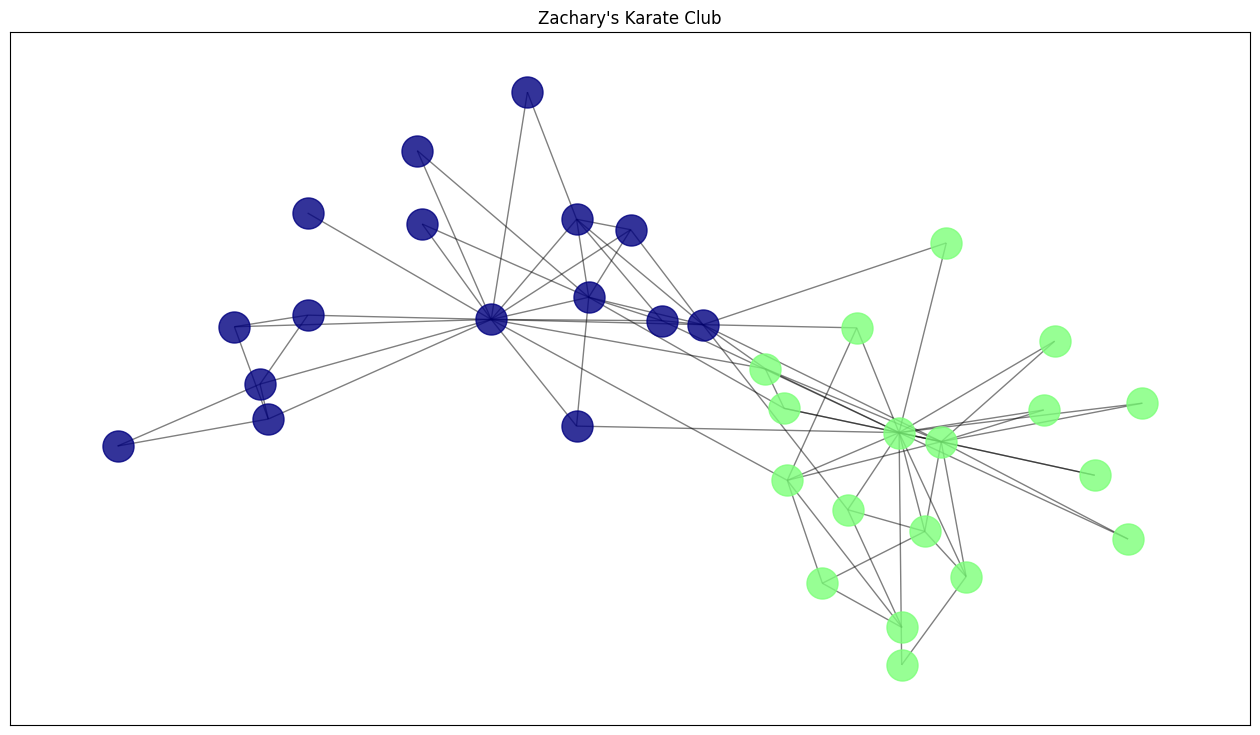

In [ ]:
draw_communities(G, y_true, pos)

# Question 5.3 [2 points]


Now suppose had access only to the Network data (adjacency matrix). Let us run spectral clustering on the adjacency matrix to see what how this method would split the network into two communities. [Code modified from this Gitub repo](https://github.com/lejomarin/community-network-detection/blob/main/Karate%20club%20-%20network%20dataset.ipynb)

As you will see the clustering algorithm is able to faithfully find what happened to this club. Run the code below.


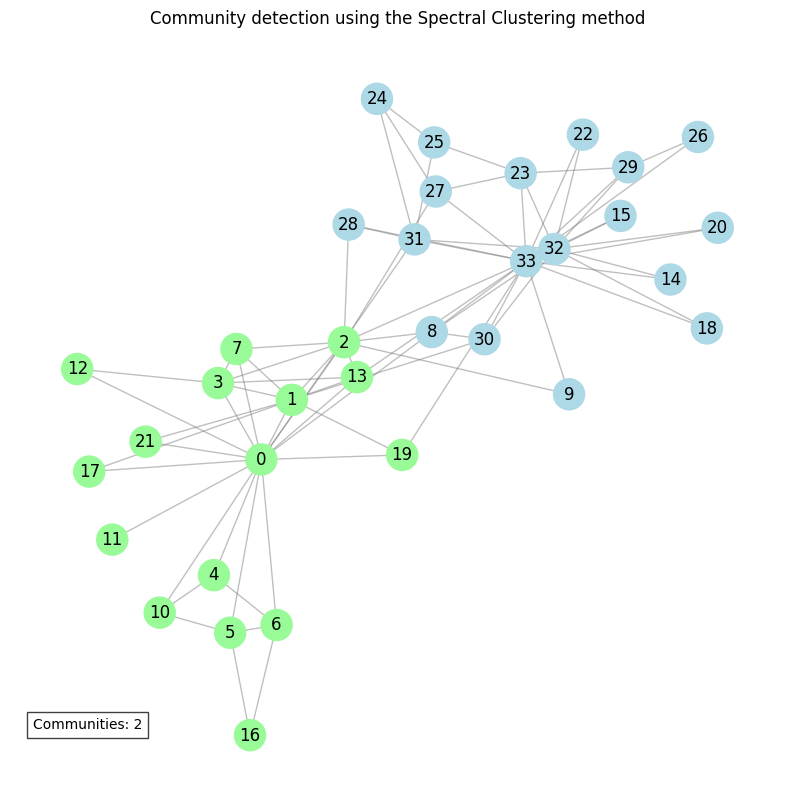

In [ ]:
from matplotlib.colors import ListedColormap

# define a custom colormap
cmap = ListedColormap(['#add8e6', '#98fb98'])

import numpy as np
from sklearn.cluster import SpectralClustering

# compute the adjacency matrix of the network
A = nx.adjacency_matrix(G).toarray()

# create a spectral clustering model
sc = SpectralClustering(2, affinity='precomputed', n_init=100)

# fit the model to the adjacency matrix
sc.fit(A)

# get the labels of the nodes in each community
labels = sc.labels_

# create a dictionary that maps each node to a community
community_dict = {node: labels[i] for i, node in enumerate(G.nodes)}

# print the sets of nodes in each community
communities = {}
for node, community in community_dict.items():
    if community not in communities:
        communities[community] = []
    communities[community].append(node)

communities

# plot the network with nodes colored by community and with labels
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, community_dict.keys(), node_size=500, cmap=cmap, node_color=list(community_dict.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos)
plt.title("Community detection using the Spectral Clustering method")
plt.text(0.1, 0.1, 'Communities: {}'.format(len(communities)), horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.75))
plt.axis('off')
plt.savefig("Community detection using the Spectral Clustering method.png",dpi=200, bbox_inches='tight')

plt.show()

# This is the end of this Lab!